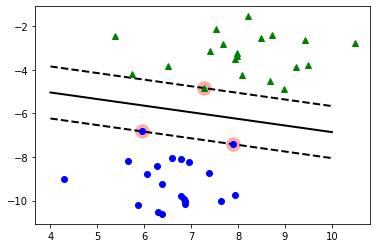

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

def plot_svc_decision_boundary(clf, xmin, xmax,sv=True):
    #画出分类超平面
    w = clf.coef_[0]
    b = clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    #计算超平面方程
    decision_boundary = - w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    #上、下两条间隔平面
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    #标出支持向量的样本点
    if sv:
        svs = clf.support_vectors_
        plt.scatter(svs[:,0],svs[:,1],s=180,facecolors='#FFAAAA')
    #分别画出超平面及上下两条间隔平面
    plt.plot(x0,decision_boundary,'k-',linewidth=2)
    plt.plot(x0,gutter_up,'k--',linewidth=2)
    plt.plot(x0,gutter_down,'k--',linewidth=2)

# 生成数据集
X, y = make_blobs(n_samples=40, centers=2, random_state=6)
# 创建SVM模型
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)
#调用函数，显示分类超平面
plot_svc_decision_boundary(clf, 4, 10)
#显示数据集
plt.plot(X[:,0][y==1],X[:,1][y==1],'bo')
plt.plot(X[:,0][y==0],X[:,1][y==0],'g^')
plt.show()

[-1, 3, 0, 4]

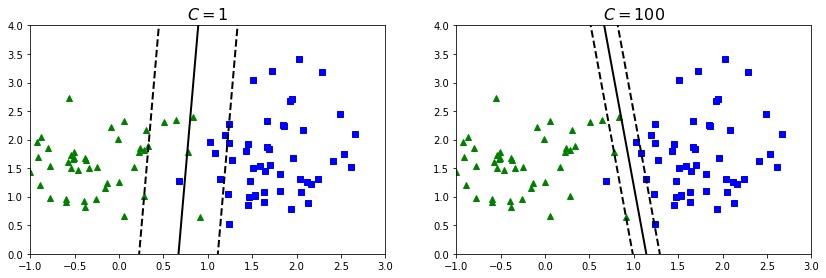

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.datasets import  make_classification
#生成数据集
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 1.5 * rng.uniform(size=X.shape)
#创建两个SVC模型，C参数不同
svm_clf1 = SVC(kernel='linear',C=1)
svm_clf2 = SVC(kernel='linear',C=100)
svm_clf1.fit(X,y)
svm_clf2.fit(X,y)
#对比两个模型的分类超平面
plt.figure(figsize=(14,4.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="x1")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="x2")
plot_svc_decision_boundary(svm_clf1, -2, 3,sv=False)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([-1, 3, 0, 4])
plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, -2, 3,sv=False)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([-1, 3, 0, 4])
